# Phishing Website Detection by Machine Learning Techniques


# Loading Data:
The features are extracted and store in the csv file. The working of this can be seen in the 'Phishing Website Detection_Feature Extraction.ipynb' file.

The reulted csv file is uploaded to this notebook and stored in the dataframe.

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
data0 = pd.read_csv('5.urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


# Familiarizing with Data
In this step, few dataframe methods are used to look into the data and its features.

In [3]:
data0.shape

(10000, 18)

In [4]:
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [5]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

# Visualizing the data
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

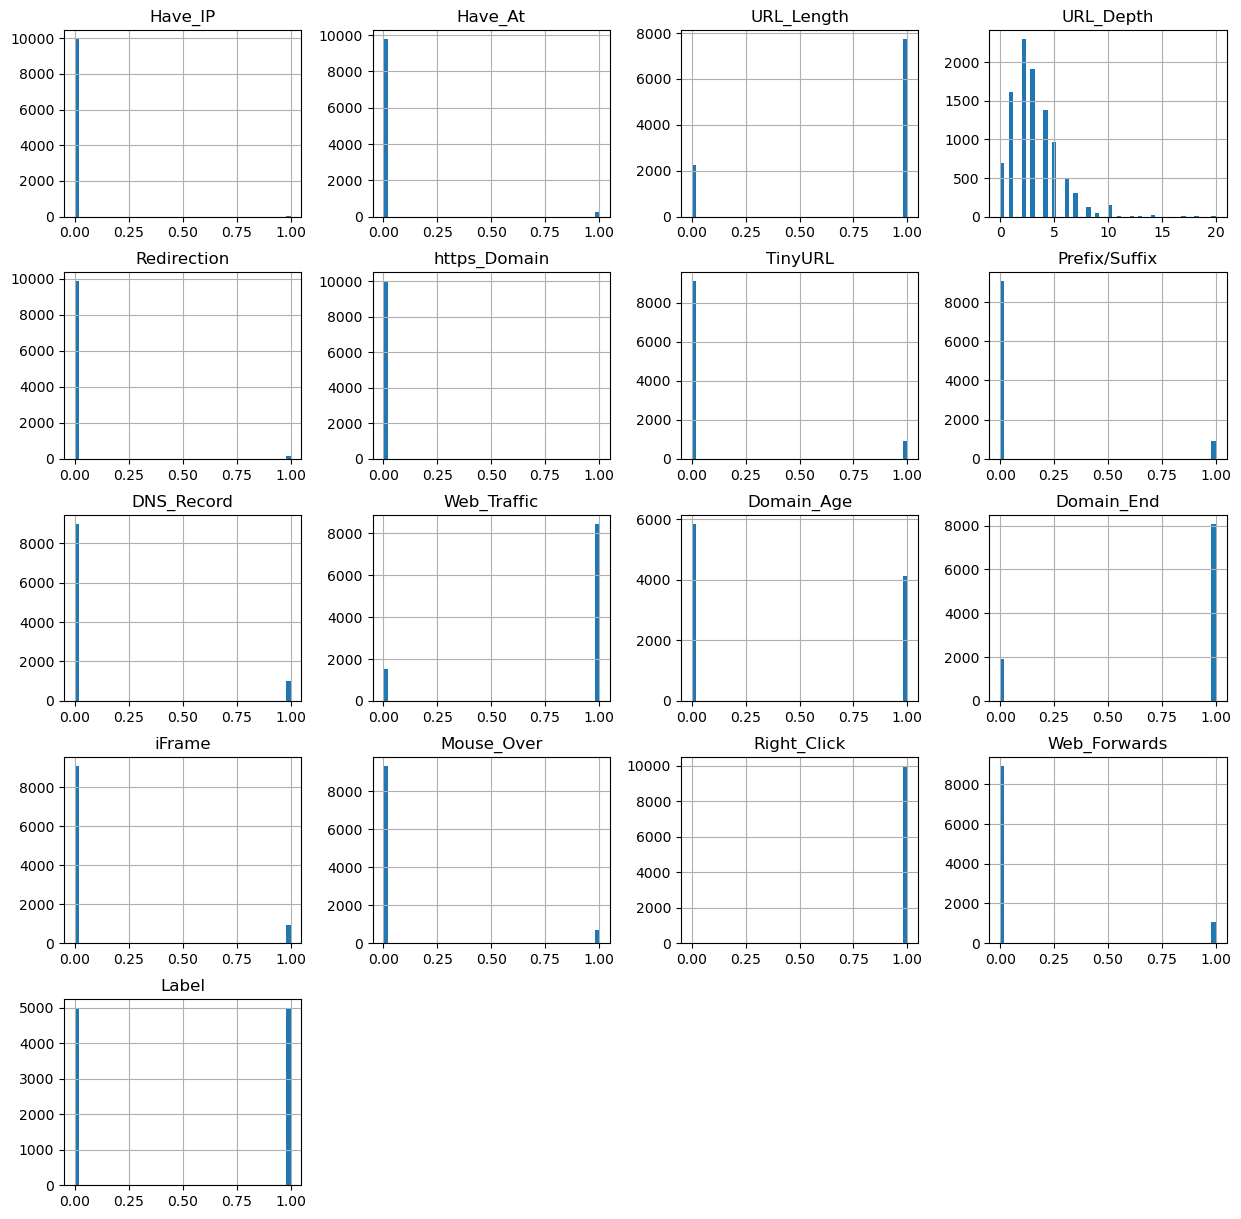

In [6]:
data0.hist(bins = 50,figsize = (15,15))
plt.show()

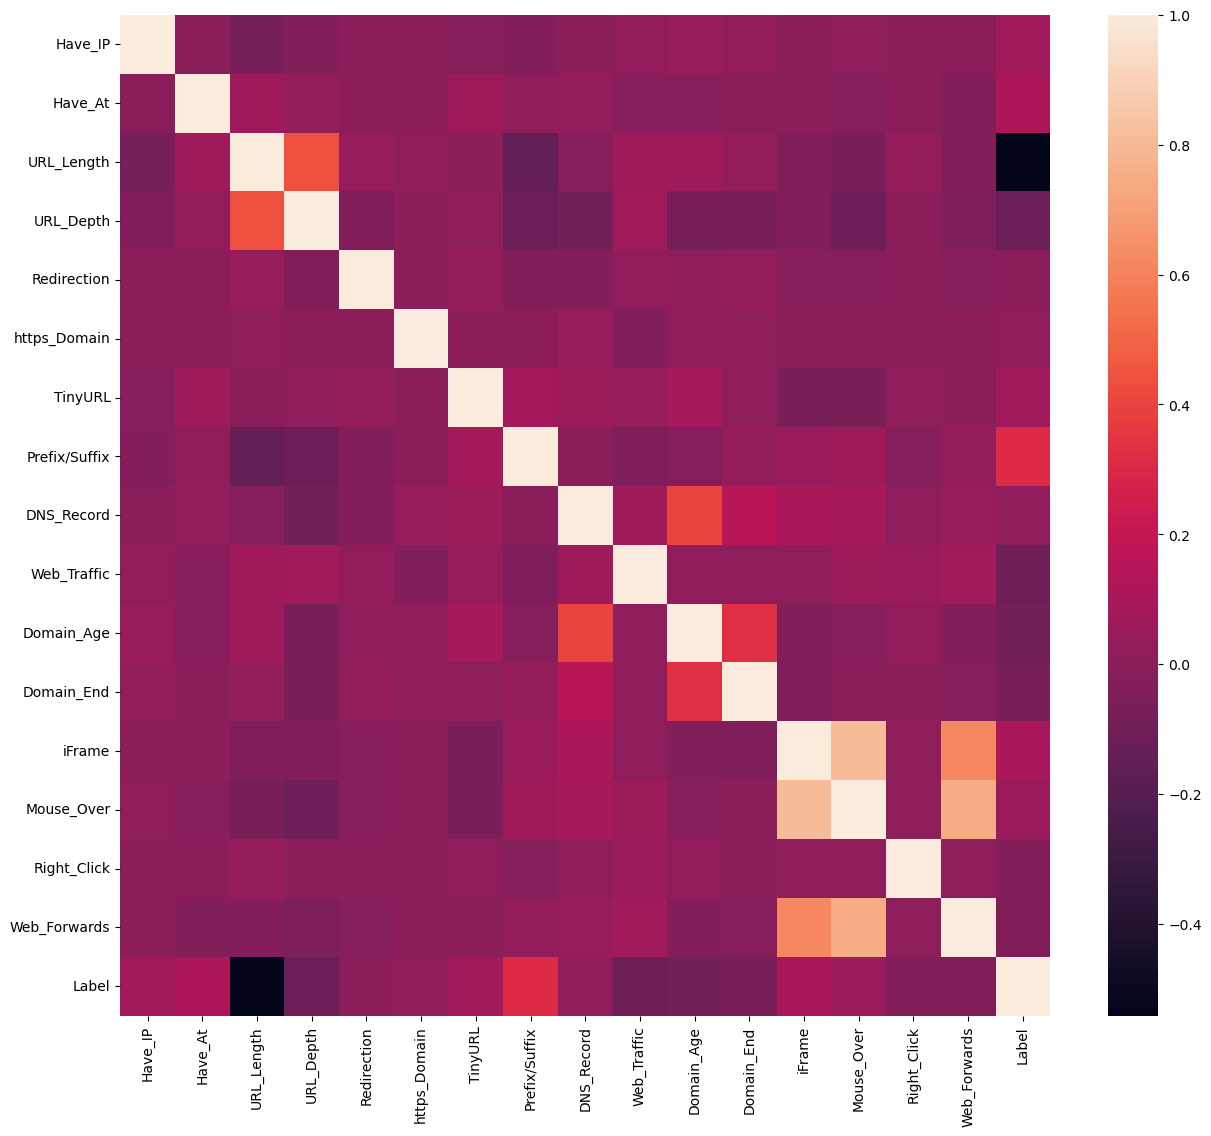

In [7]:
plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

# Data Preprocessing & EDA
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [8]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the 'Domain' column from the dataset.



In [9]:
data = data0.drop(['Domain'], axis = 1).copy()

This leaves us with 16 features & a target column. The 'URL_Depth' maximum value is 20. According to my understanding, there is no necessity to change this column.

In [10]:
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data.

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [11]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,1,0,1,1,1,0,0,1,1,1
1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1
2,0,0,1,2,0,0,0,0,0,1,1,1,0,0,1,0,0
3,0,0,1,2,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,1,2,0,0,0,0,0,1,0,1,0,0,1,0,1


# Splitting the Data

In [12]:
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

# Machine Learning Models & Training
From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression.

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:

Decision Tree
Random Forest
Multilayer Perceptrons
XGBoost
Support Vector Machines


In [14]:
from sklearn.metrics import accuracy_score

In [15]:
ML_Model = []
acc_train = []
acc_test = []
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

# Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [17]:
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)


# Performance Evaluation:

In [18]:
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.807
Decision Tree: Accuracy on test Data: 0.837


In [19]:
print("Decision Tree:")
print(classification_report(y_test, y_test_tree))


Decision Tree:
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      1015
           1       0.97      0.69      0.81       985

    accuracy                           0.84      2000
   macro avg       0.87      0.83      0.83      2000
weighted avg       0.87      0.84      0.83      2000



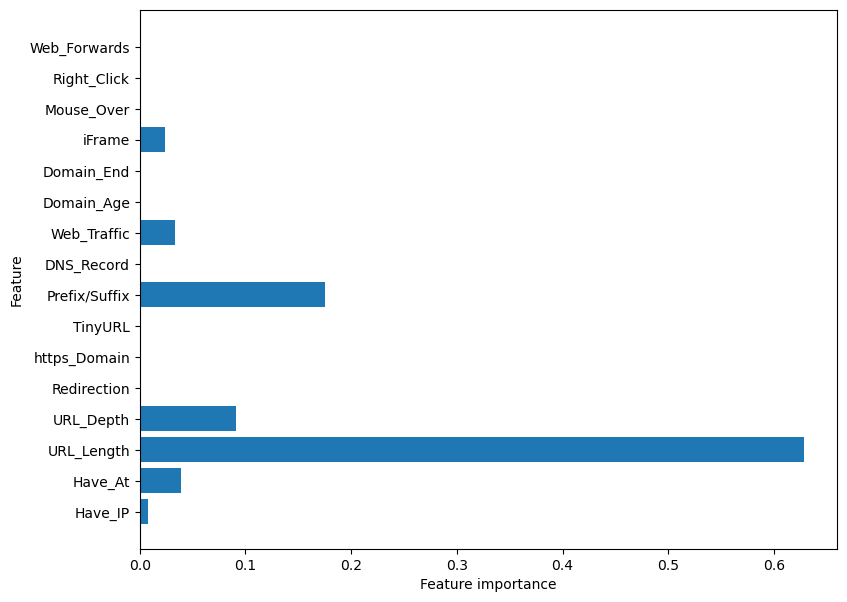

In [20]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [21]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

# Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [23]:
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

# Performance Evaluation:



In [24]:
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.813
Random forest: Accuracy on test Data: 0.841


In [25]:
print("Random Forest:")
print(classification_report(y_test, y_test_forest))

Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.99      0.86      1015
           1       0.98      0.69      0.81       985

    accuracy                           0.84      2000
   macro avg       0.87      0.84      0.84      2000
weighted avg       0.87      0.84      0.84      2000



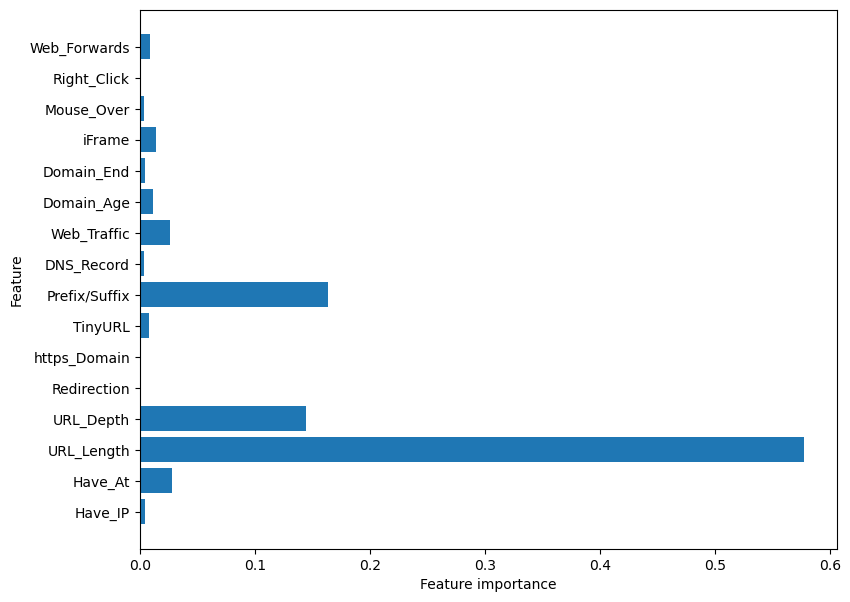

In [26]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [27]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

# Multilayer Perceptrons (MLPs): Deep Learning

In [28]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [29]:
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [30]:
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.861
Multilayer Perceptrons: Accuracy on test Data: 0.875


In [31]:
print("Multilayer Perceptrons:")
print(classification_report(y_test, y_test_mlp))

Multilayer Perceptrons:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1015
           1       0.92      0.82      0.87       985

    accuracy                           0.88      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.88      0.88      0.88      2000



In [32]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

# XGBoost Classifier

In [33]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [34]:
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [35]:
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.863
XGBoost : Accuracy on test Data: 0.876


In [36]:
print("XGBoost:")
print(classification_report(y_test, y_test_xgb))

XGBoost:
              precision    recall  f1-score   support

           0       0.85      0.93      0.88      1015
           1       0.92      0.83      0.87       985

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



In [37]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

In [38]:
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [39]:

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 14)                238       
                                                                 
 dense_5 (Dense)             (None, 16)                240       
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
Total params: 1,294
Trainable params: 1,294
Non-trainable par

# Support Vector Machines

In [40]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=12)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [41]:
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [42]:
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.797
SVM : Accuracy on test Data: 0.823


In [43]:
print("SVM:")
print(classification_report(y_test, y_test_svm))

SVM:
              precision    recall  f1-score   support

           0       0.75      0.97      0.85      1015
           1       0.96      0.67      0.79       985

    accuracy                           0.82      2000
   macro avg       0.86      0.82      0.82      2000
weighted avg       0.85      0.82      0.82      2000



In [44]:
storeResults('SVM', acc_train_svm, acc_test_svm)

# Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.



In [45]:
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.807,0.837
1,Random Forest,0.813,0.840
2,Multilayer Perceptrons,0.861,0.876
3,XGBoost,0.863,0.876
4,SVM,0.797,0.823


In [46]:
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,XGBoost,0.863,0.876
2,Multilayer Perceptrons,0.861,0.876
1,Random Forest,0.813,0.840
0,Decision Tree,0.807,0.837
4,SVM,0.797,0.823


In [47]:
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

# Testing the saved model:

In [48]:
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# Confusion Matrix:

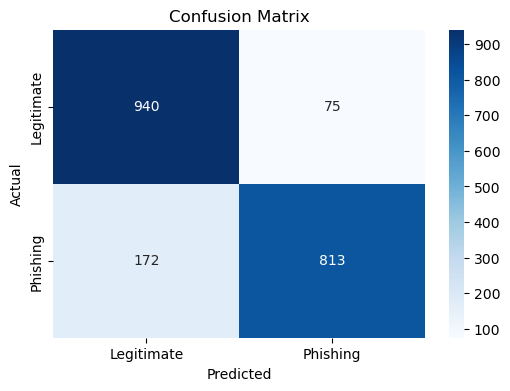

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = xgb.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
class_labels = ['Legitimate', 'Phishing']
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
